In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [9]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'


In [10]:
img_width = 180
img_height = 180

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle = True, image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 3115 files belonging to 36 classes.


In [48]:
data_cat = data_train.class_names

In [13]:
data_val =  tf.keras.utils.image_dataset_from_directory(data_val_path, image_size=(img_height,img_width),batch_size=32,shuffle=False,validation_split=False)

Found 351 files belonging to 36 classes.


In [14]:
data_test=  tf.keras.utils.image_dataset_from_directory(data_test_path, image_size=(img_height,img_width),batch_size=32,shuffle=False,validation_split=False)

Found 359 files belonging to 36 classes.


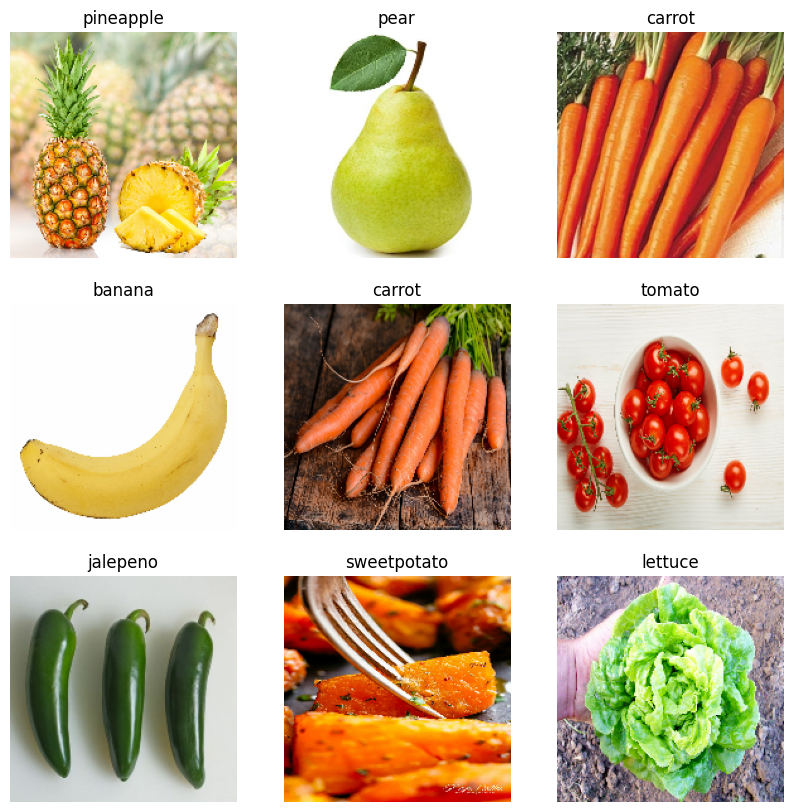

In [16]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [17]:
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [24]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])

In [25]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25


98/98 [==============================] - 129s 1s/step - loss: 3.3941 - accuracy: 0.1149 - val_loss: 2.3157 - val_accuracy: 0.3077
Epoch 2/25
98/98 [==============================] - 101s 977ms/step - loss: 2.4056 - accuracy: 0.2963 - val_loss: 1.7164 - val_accuracy: 0.5499
Epoch 3/25
98/98 [==============================] - 103s 989ms/step - loss: 1.9783 - accuracy: 0.4154 - val_loss: 1.1357 - val_accuracy: 0.6923
Epoch 4/25
98/98 [==============================] - 103s 988ms/step - loss: 1.5256 - accuracy: 0.5512 - val_loss: 0.7841 - val_accuracy: 0.8148
Epoch 5/25
98/98 [==============================] - 103s 988ms/step - loss: 1.0132 - accuracy: 0.6963 - val_loss: 0.4883 - val_accuracy: 0.9003
Epoch 6/25
98/98 [==============================] - 103s 992ms/step - loss: 0.6189 - accuracy: 0.8209 - val_loss: 0.3987 - val_accuracy: 0.9145
Epoch 7/25
98/98 [==============================] - 103s 987ms/step - loss: 0.4398 - accuracy: 0.8706 - val_loss: 0.3662 - val_accuracy: 

In [26]:
import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


Text(0.5, 1.0, 'Loss')

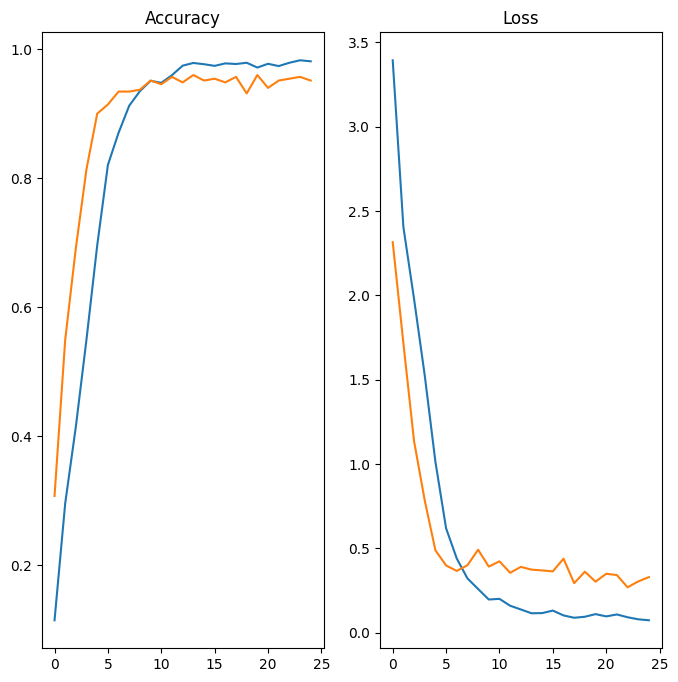

In [29]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [42]:
image = 'Chilli.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [43]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 48ms/step


In [44]:
score = tf.nn.softmax(predict)

In [45]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is paprika with accuracy of 99.71


In [46]:
model.save('Image_classify.keras')